In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#loading the data set
insurance_dt = pd.read_csv('C:/Users/MACHIRA/Projects_With_Siddardhan/data/insurance.csv')
insurance_dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#number of rows and columns
insurance_dt.shape

(1338, 7)

In [4]:
#infor about the dataset
insurance_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Categorical Features:
    sex
    smoker
    region
    

In [5]:
#check for missing values
insurance_dt.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#statistic Overview
insurance_dt.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\MACHIRA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


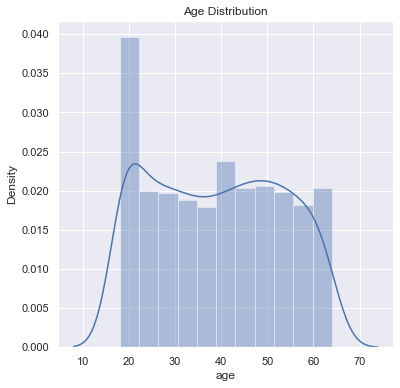

In [7]:
#Distribution of the age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dt['age'])
plt.title('Age Distribution')
plt.show()

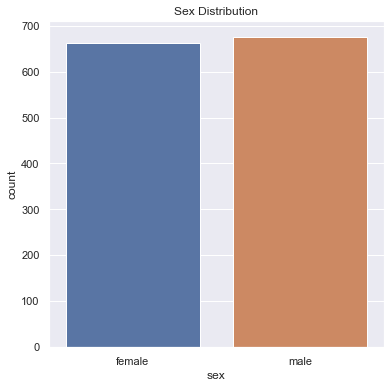

In [8]:
#Plot for the gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dt)
plt.title('Sex Distribution')
plt.show()

In [9]:
insurance_dt['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\MACHIRA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


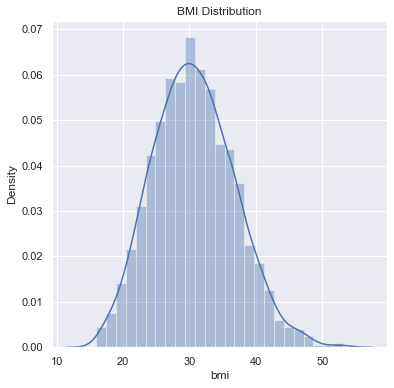

In [10]:
#BMI Distribution 
plt.figure(figsize=(6,6))
sns.distplot(insurance_dt['bmi'])
plt.title('BMI Distribution')
plt.show()

#### Normal BMI Range --> 18.5 to 24.9

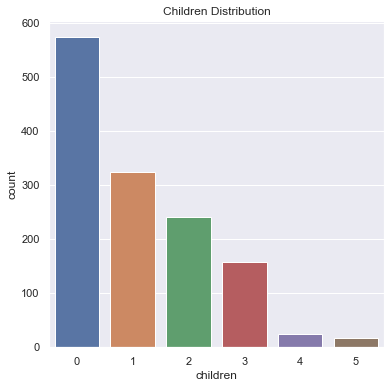

In [11]:
#Distribution of the children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dt)
plt.title('Children Distribution')
plt.show()

In [12]:
insurance_dt['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

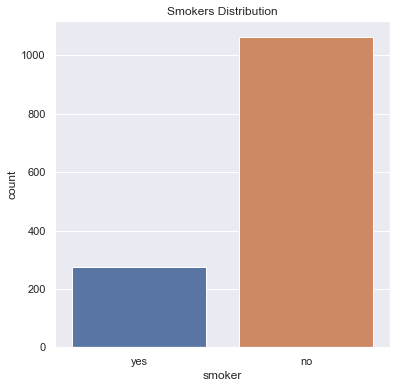

In [13]:
#Distribution of the smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dt)
plt.title('Smokers Distribution')
plt.show()

In [14]:
insurance_dt['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

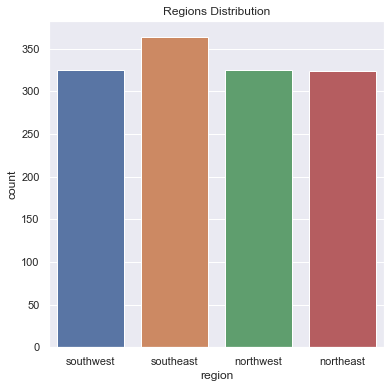

In [15]:
#Distribution of the region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dt)
plt.title('Regions Distribution')
plt.show()

In [16]:
insurance_dt['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\MACHIRA\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


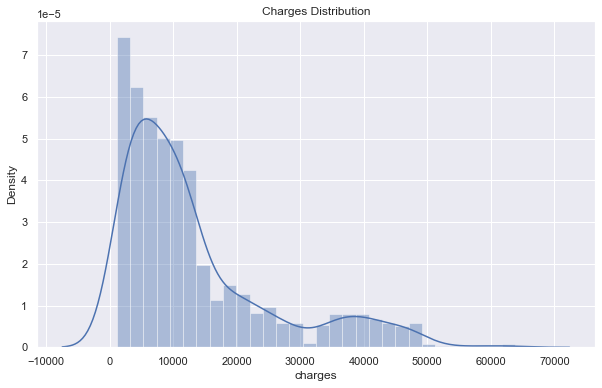

In [17]:
#Charges Distribution 
plt.figure(figsize=(10,6))
sns.distplot(insurance_dt['charges'])
plt.title('Charges Distribution')
plt.show()

#### Encoding the categorical features

In [18]:
#ecoding the sex column
insurance_dt.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

#ecoding the smoker column
insurance_dt.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

#ecoding the region column
insurance_dt.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

### Splitting the Features and the Target


In [19]:
X = insurance_dt.drop(columns='charges', axis=1)
Y = insurance_dt['charges']

### Splitting the data into Training data and the Test data

In [20]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

### Model Training
#### Linear Regression

In [21]:
model = LinearRegression()

#### Training the model with the training data

In [22]:
model.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [23]:
#prediction on the training data
train_dt_pred = model.predict(X_train)

In [24]:
# R squared value
r2_train = metrics.r2_score(train_dt_pred, Y_train)
print(' R squared value :', r2_train)

 R squared value : 0.669338003290461


In [25]:
#prediction on the test data
test_dt_pred = model.predict(x_test)

In [26]:
# R squared value
r2_test = metrics.r2_score(test_dt_pred, y_test)
print(' R squared value :', r2_test)

 R squared value : 0.6606659986058927


### Building a Predictive System

In [30]:
input_data= (19,0,24.6,1,1,1)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_reshaped = input_data_as_numpy_array.reshape(1,-1)

pred = model.predict(input_reshaped)
print(pred)

[1132.66189998]
